In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Data Exploration

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [7]:
dict = {}
for column in df.columns:
    dict[column] = df[column].unique()
dict

{'Age': array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
        56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
        29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
       dtype=int64),
 'Sex': array(['M', 'F'], dtype=object),
 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 'RestingBP': array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
        145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
         92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
        116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
        102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
        129, 164], dtype=int64),
 'Cholesterol': array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
        234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
        188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Heart Disease with respect to Sex')

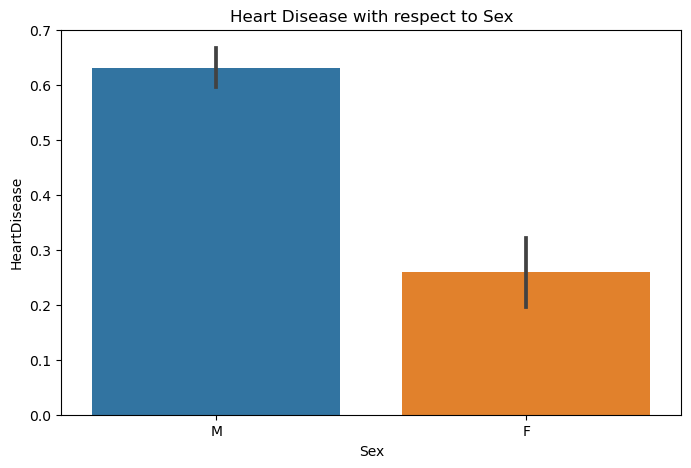

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'Sex', y = 'HeartDisease', data = df)
plt.title("Heart Disease with respect to Sex")

In [10]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Text(0.5, 1.0, 'Heart Disease with respect to ChestPainType')

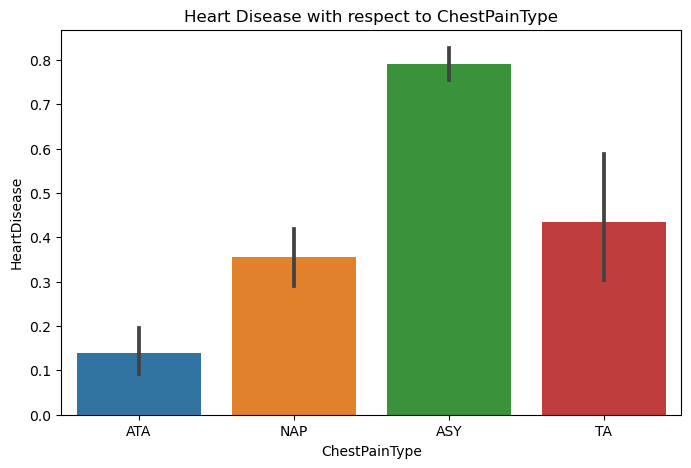

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'ChestPainType', y = 'HeartDisease', data = df)
plt.title("Heart Disease with respect to ChestPainType")

In [12]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Data Preprocessing

In [13]:
df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [14]:
df.drop(df[df['RestingBP'] == 0].index, inplace = True) 

In [15]:
df['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [16]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [17]:
df['Cholesterol'].replace({0 : df['Cholesterol'].median()}, inplace = True )

In [18]:
#Biased column - needs to drop here as data distibution is not balanced
df['FastingBS'].value_counts()

0    703
1    214
Name: FastingBS, dtype: int64

In [19]:
df.drop('FastingBS', axis = 1, inplace = True)

In [20]:
#some negative values are here that needs to converted to positive
df['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [21]:
df['Oldpeak'] = df['Oldpeak'].abs()

### Feature Engineering

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [23]:
df['RestingECG'].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [24]:
df['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [25]:
df = pd.concat([df, pd.get_dummies(df[['Sex', 'ExerciseAngina', 'ChestPainType', 'RestingECG']])], axis = 'columns')
df.drop(['Sex', 'ExerciseAngina', 'ChestPainType', 'RestingECG'], axis = 1, inplace = True)
df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289.0,172,0.0,Up,0,0,1,1,0,0,1,0,0,0,1,0
1,49,160,180.0,156,1.0,Flat,1,1,0,1,0,0,0,1,0,0,1,0
2,37,130,283.0,98,0.0,Up,0,0,1,1,0,0,1,0,0,0,0,1
3,48,138,214.0,108,1.5,Flat,1,1,0,0,1,1,0,0,0,0,1,0
4,54,150,195.0,122,0.0,Up,0,0,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,132,1.2,Flat,1,0,1,1,0,0,0,0,1,0,1,0
914,68,144,193.0,141,3.4,Flat,1,0,1,1,0,1,0,0,0,0,1,0
915,57,130,131.0,115,1.2,Flat,1,0,1,0,1,1,0,0,0,0,1,0
916,57,130,236.0,174,0.0,Flat,1,1,0,1,0,0,1,0,0,1,0,0


In [26]:
df['ST_Slope'].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [27]:
df['ST_Slope'].replace(['Up', 'Flat', 'Down'], [1, 0, -1], inplace = True)

In [28]:
df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289.0,172,0.0,1,0,0,1,1,0,0,1,0,0,0,1,0
1,49,160,180.0,156,1.0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,37,130,283.0,98,0.0,1,0,0,1,1,0,0,1,0,0,0,0,1
3,48,138,214.0,108,1.5,0,1,1,0,0,1,1,0,0,0,0,1,0
4,54,150,195.0,122,0.0,1,0,0,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,132,1.2,0,1,0,1,1,0,0,0,0,1,0,1,0
914,68,144,193.0,141,3.4,0,1,0,1,1,0,1,0,0,0,0,1,0
915,57,130,131.0,115,1.2,0,1,0,1,0,1,1,0,0,0,0,1,0
916,57,130,236.0,174,0.0,0,1,1,0,1,0,0,1,0,0,1,0,0


### Splitting data

In [29]:
X = df.drop('HeartDisease', axis = 1)
y = df[['HeartDisease']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
795,42,120,240.0,194,0.8,-1,0,1,1,0,0,0,1,0,0,1,0
25,36,130,209.0,178,0.0,1,0,1,1,0,0,0,1,0,0,1,0
84,56,150,213.0,125,1.0,0,0,1,0,1,1,0,0,0,0,1,0
10,37,130,211.0,142,0.0,1,1,0,1,0,0,0,1,0,0,1,0
344,51,120,223.0,104,0.0,0,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120,254.0,110,0.0,1,1,0,1,0,1,0,0,0,0,0,1
270,45,120,225.0,140,0.0,1,0,1,1,0,1,0,0,0,0,1,0
861,65,110,248.0,158,0.6,1,0,1,1,0,1,0,0,0,1,0,0
435,60,152,223.0,118,0.0,1,0,1,0,1,1,0,0,0,0,0,1


In [32]:
#Needs to scale some column as some columns contain little bit higher value with respect to other column
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_train[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']] = scaler.fit_transform(X_train[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']])

In [34]:
#On test data only transform needs to be done, fitting is done only on train data
#After splitting we assume that we are not aware of test data. So we consider our test data will behave same as train data
X_test[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']] = scaler.transform(X_test[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']])

In [35]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
795,-1.240174,-0.723044,-0.036831,2.279003,0.8,-1,0,1,1,0,0,0,1,0,0,1,0
25,-1.880274,-0.159703,-0.623322,1.648325,0.0,1,0,1,1,0,0,0,1,0,0,1,0
84,0.253391,0.966979,-0.547645,-0.440797,1.0,0,0,1,0,1,1,0,0,0,0,1,0
10,-1.773590,-0.159703,-0.585484,0.229298,0.0,1,1,0,1,0,0,0,1,0,0,1,0
344,-0.280025,-0.723044,-0.358455,-1.268563,0.0,0,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.600075,-0.723044,0.228035,-1.032058,0.0,1,1,0,1,0,1,0,0,0,0,0,1
270,-0.920125,-0.723044,-0.320617,0.150464,0.0,1,0,1,1,0,1,0,0,0,0,1,0
861,1.213540,-1.286385,0.114521,0.859977,0.6,1,0,1,1,0,1,0,0,0,1,0,0
435,0.680124,1.079647,-0.358455,-0.716719,0.0,1,0,1,0,1,1,0,0,0,0,0,1


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [37]:
pca.explained_variance_ratio_

array([0.28495503, 0.14272574, 0.12700863, 0.11313098, 0.08920912,
       0.04946702, 0.041856  , 0.03622924, 0.03255362, 0.02911127,
       0.024002  ])

In [38]:
X_train.shape

(733, 11)

### HyperParameter Tuning

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [40]:
cross_val_score(RandomForestClassifier(n_estimators=40), X_train, y_train, cv=3)

array([0.84081633, 0.82377049, 0.80327869])

In [41]:
cross_val_score(xgb.XGBClassifier(eval_metric='mlogloss'), X_train, y_train, cv=3)

array([0.84081633, 0.7704918 , 0.81967213])

In [42]:
cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=3)

array([0.77959184, 0.71721311, 0.76229508])

In [43]:
cross_val_score(SVC(), X_train, y_train, cv=3)

array([0.86122449, 0.81967213, 0.81967213])

In [44]:
cross_val_score(LogisticRegression(), X_train, y_train, cv=3)

array([0.89387755, 0.83606557, 0.82377049])

In [45]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=4, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.03083545, 0.02184814, 0.02639437, 0.06957054, 0.02798295,
        0.12188089]),
 'std_fit_time': array([0.00435568, 0.00829782, 0.00534955, 0.01510653, 0.00682908,
        0.04277195]),
 'mean_score_time': array([0.01486039, 0.00409538, 0.01381844, 0.00396442, 0.01454484,
        0.00328052]),
 'std_score_time': array([0.00613518, 0.0065311 , 0.00747375, 0.00686658, 0.00842563,
        0.00358997]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [46]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=4, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.847158
1,10,rbf,0.821246


In [47]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5, 10, 20]
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1, 10, 20],
            'kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'xgb_classifier' : {
        'model': xgb.XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'n_estimators' : [5, 10, 20]
        }
    }
}

In [48]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,random_forest,0.817128,{'n_estimators': 20}
1,svm,0.851225,"{'C': 10, 'kernel': 'linear'}"
2,logistic_regression,0.844413,{'C': 1}
3,xgb_classifier,0.830817,{'n_estimators': 20}


In [49]:
Algorithm = []
Accuracy_score = []
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
Algorithm.append("RandomForestClassifier")
Accuracy_score.append(accuracy_score(y_pred, y_test, normalize = True))

In [51]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
Algorithm.append("LogisticRegression")
Accuracy_score.append(accuracy_score(y_pred, y_test, normalize = True))

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
Algorithm.append("DecisionTreeClassifier")
Accuracy_score.append(accuracy_score(y_pred, y_test, normalize = True))

In [53]:
xgbClassifier = xgb.XGBClassifier(eval_metric='mlogloss')
xgbClassifier.fit(X_train, y_train)
y_pred = xgbClassifier.predict(X_test)
Algorithm.append("XGBClassifier")
Accuracy_score.append(accuracy_score(y_pred, y_test, normalize = True))

In [54]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
Algorithm.append("SupportVectorClassifier")
Accuracy_score.append(accuracy_score(y_pred, y_test, normalize = True))

In [55]:
comparison_df = pd.DataFrame(list(zip(Algorithm, Accuracy_score)), columns = ['Algorithm', 'Accuracy_Score'])
comparison_df

,Algorithm,Accuracy_Score
0,RandomForestClassifier,0.831522
1,LogisticRegression,0.826087
2,DecisionTreeClassifier,0.728261
3,XGBClassifier,0.847826
4,SupportVectorClassifier,0.853261


In [56]:
print('Classification report: ')
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.90      0.86      0.88       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [57]:
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

Confusion matrix: 
[[61 11]
 [16 96]]


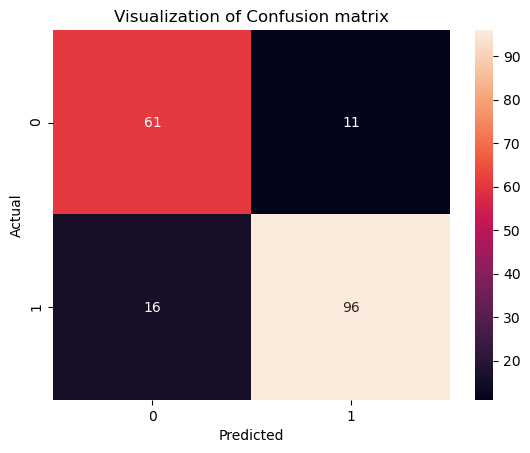

In [58]:
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Visualization of Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()